In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 11,7

Поработаем с датасетом содержащим информацию о винных обзорах

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv')
print(df.shape)

(129971, 14)


In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Данные о стране и стоимости вин имеются не во всех обзорах, поэтому уберем эти обзоры из набора. Так же уберем столбец Unnamed: 0

In [5]:
df = df.dropna(axis='index', how='any', subset=['country', 'price'])
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
print(df.shape)

(120916, 13)


Построим `boxplot` распределения баллов выставленных дегустаторами по всем обзорам

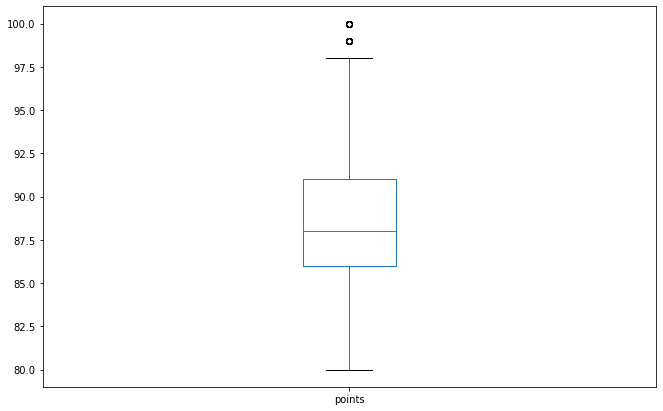

In [6]:
df['points'].plot(kind='box')

По данному `boxplot` мы видим, что набор данных содержит только обзоры с оценками от 80 баллов. Медиана распределения баллов отметилась уровне 88 баллов. Максимальная оценка в обзорах составила 98 баллов, и очень редко дегустаторы выставляли 99 и 100 баллов

Построим столбчатую диаграмму, отображающую количество обзоров вин из 10 наиболее популярных стран

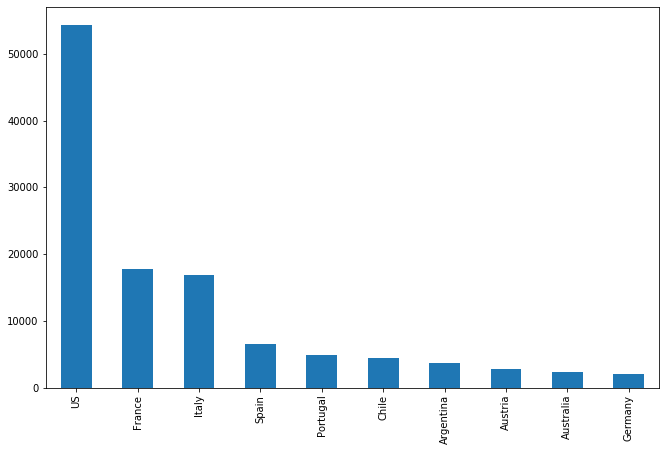

In [8]:
df_country_counts = df.country.value_counts().sort_values(ascending = False).head(10)
df_country_counts.plot(kind='bar')

Самыми распространенными по количеству обзоров стали вина США, они составляют 50% от всех обзоров в наборе данных. США – один из крупнейших производителей вин в мире.

Теперь посмотрим наблюдается ли связь межжду такими параметрами как, количество баллов, выставленное дегустатором и стоимостью вина за бутылку. Посторим визуализацию с помощью графика `pair plot`

In [9]:
import seaborn as sns

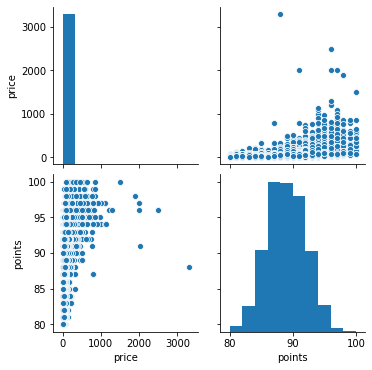

In [10]:
sns_plot = sns.pairplot(
    df[['price', 'points']])
sns_plot

На графике прослеживатся связь между данными параметрами, но имеются и "выбросы". Например, самое дорогое вино, стоимостью более 3000 оценили в 88 баллов (50% обзоров имеют такую оценку)

Теперь построим `boxplot` распределения баллов выставленных дегустаторами в разрезе стран производства. Возьмем 15 наиболее распрастраненных стран

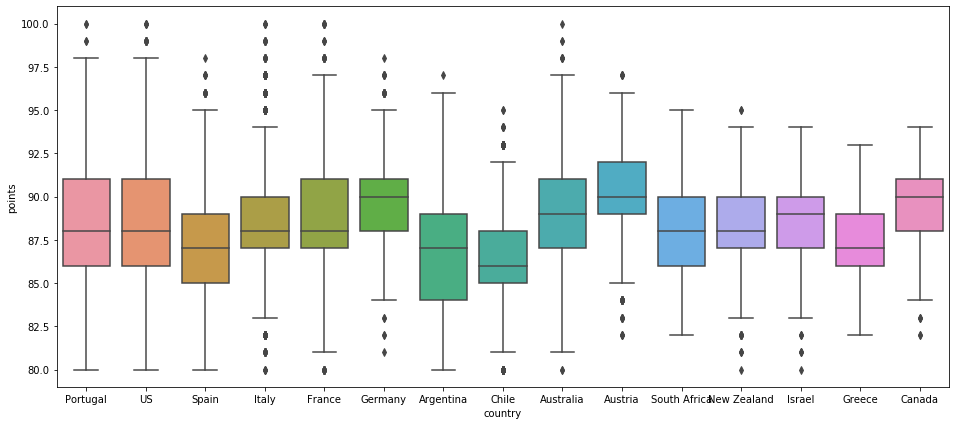

In [11]:
top_countrys = df.country.value_counts().sort_values(ascending = False).head(15).index.values
fig, ax = plt.subplots(figsize=(16,7)) 
ax = sns.boxplot(x="country", y="points", 
            data=df[df.country.isin(top_countrys)])

Оценки вин стран США и Португалии распределились идентично. Они имеют самые высокие верхние границы и самые низкие нижние. Так же данное распреление баллов идентично распределению в целом по всему набору, ввиду того, что 50% вин в обзорах это вина США. Наиболее низкие баллы получили вина Чили. Вина Австрии имеют самую высокую нижнюю границу и медиану распределения баллов.

Теперь так же посмотрим распределение баллов в разрезе 15 наиболее распространенных сортов вин

In [12]:
top_variety = df.variety.value_counts().sort_values(ascending = False).head(15)
top_variety

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
Name: variety, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

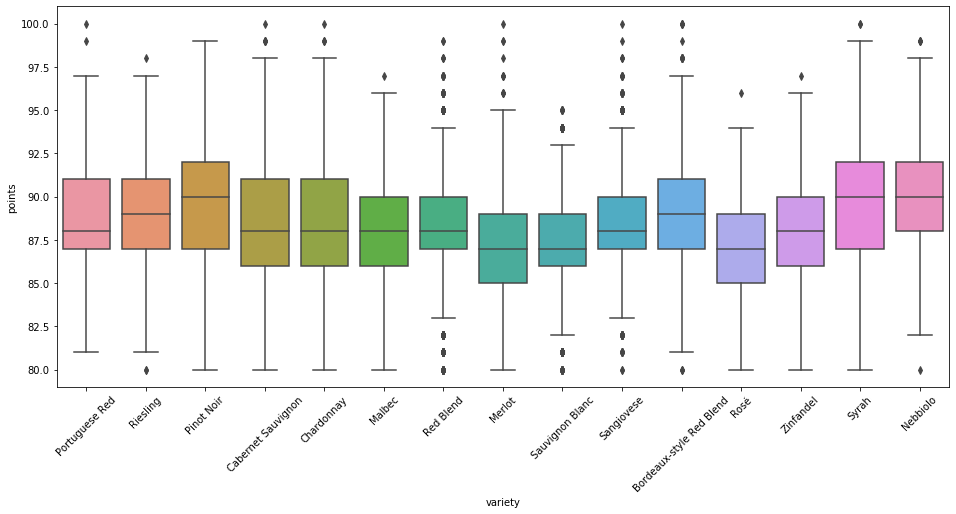

In [13]:
fig, ax = plt.subplots(figsize=(16,7)) 
ax = sns.boxplot(x="variety", y="points", 
            data=df[df.variety.isin(top_variety.index.values)])
plt.xticks(rotation=45)

Наиболее высокие оценки имеют вина сортов Шираз и Пино Наур. Так же нужно учесть, что на вина сорта Пино Нуар опубликовано больше всего обзоров. На основании высоких оценок и множества отзывов можно сделать вывод, что данный сорт определенно входит в рейтинг самых лучший вин. Вина сорта Неббиоло так же имеют достаточно высокие оценки. А вина сорта Совиньон Блан редко оценивают выше 93 баллов.

Теперь визуализируем на графике `heat map` среднюю стоимость бутылки вина определенного сорта по странам

In [17]:
df_top_variety = df[df['variety'].isin(top_variety.index.values)]

In [18]:
platform_country_variaty = df_top_variety.pivot_table(
                        index='country', 
                        columns='variety', 
                        values='price').fillna(0).applymap(float)
platform_country_variaty

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Nebbiolo,Pinot Noir,Portuguese Red,Red Blend,Riesling,Rosé,Sangiovese,Sauvignon Blanc,Syrah,Zinfandel
country,,,,,,,,,,,,,,,
Argentina,41.546512,19.488806,17.453287,27.957972,17.758621,64.000000,22.980583,0.000000,34.145374,15.000000,13.432432,18.000000,14.833333,17.375000,0.000000
Armenia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000
Australia,67.413793,35.441065,25.445570,65.600000,20.684211,0.000000,32.283465,0.000000,29.318182,22.244898,19.000000,15.800000,17.291667,105.500000,29.333333
Austria,36.500000,31.200000,35.277778,0.000000,35.000000,0.000000,37.036145,0.000000,34.780488,37.904472,15.396552,0.000000,29.387097,13.000000,0.000000
Brazil,22.500000,26.500000,25.000000,0.000000,19.142857,0.000000,25.000000,0.000000,35.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bulgaria,27.500000,11.150000,13.812500,40.000000,11.461538,0.000000,13.666667,0.000000,22.000000,13.333333,10.750000,0.000000,10.166667,23.666667,0.000000
Canada,48.400000,47.428571,25.615385,32.000000,30.000000,0.000000,33.086957,0.000000,29.200000,34.764706,20.000000,0.000000,21.700000,47.357143,0.000000
Chile,51.513514,20.023560,15.247059,19.021127,12.925781,0.000000,19.103352,0.000000,39.772277,16.454545,12.930233,0.000000,14.020741,28.462963,0.000000
Croatia,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,23.833333,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000


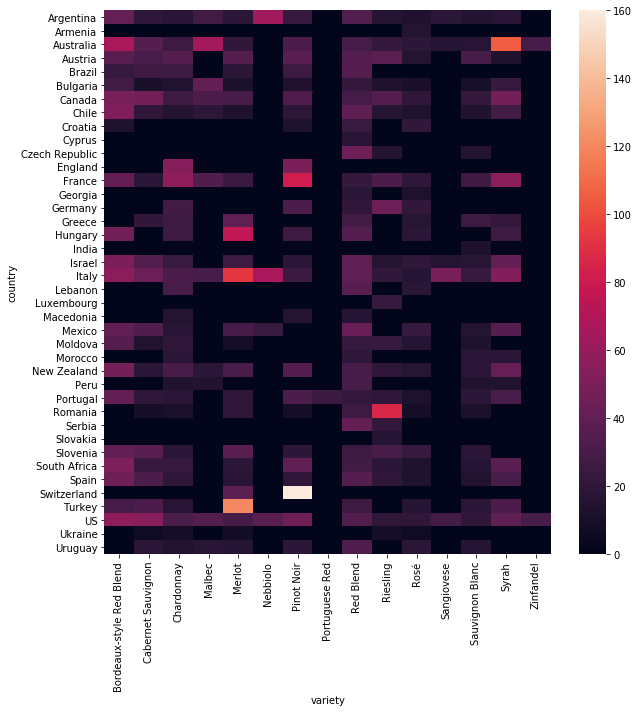

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(platform_country_variaty)

Швейцарские вина сорта Пино Нуар имеют самую высокую стоимость в среднем за бутылку.  В целом по карте можно сказать, что наиболее дорогими являются вина Австралии, Франции и Италии. 